In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D,Dropout,Flatten,MaxPooling2D,Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tqdm.notebook import tqdm 
import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
BASE_DIR = '/kaggle/input/utkface-new/UTKFace'
age_labels = []
gender_labels = []
image_paths = []

image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
  image_path = os.path.join(BASE_DIR, image)
  img_components = image.split('_')
  age_label = int(img_components[0])
  gender_label = int(img_components[1])

  # Append the image_path, age_label, and gender_label
  age_labels.append(age_label)
  gender_labels.append(gender_label)
  image_paths.append(image_path)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [4]:
print(f'Number of age_labels: {len(age_labels)}, Number of gender_labels: {len(gender_labels)}, Number of image_paths: {len(image_paths)}')

Number of age_labels: 23708, Number of gender_labels: 23708, Number of image_paths: 23708


In [5]:
print(age_labels[:10])
print(gender_labels[:10])
print(image_paths[:10])

[89, 26, 75, 43, 2, 16, 71, 2, 1, 36]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0]
['/kaggle/input/utkface-new/UTKFace/89_0_3_20170105180305886.jpg.chip.jpg', '/kaggle/input/utkface-new/UTKFace/26_1_3_20170119180550463.jpg.chip.jpg', '/kaggle/input/utkface-new/UTKFace/75_0_3_20170111202756116.jpg.chip.jpg', '/kaggle/input/utkface-new/UTKFace/43_0_4_20170104000923085.jpg.chip.jpg', '/kaggle/input/utkface-new/UTKFace/2_1_2_20161219151944003.jpg.chip.jpg', '/kaggle/input/utkface-new/UTKFace/16_0_0_20170110231553413.jpg.chip.jpg', '/kaggle/input/utkface-new/UTKFace/71_1_0_20170110160644048.jpg.chip.jpg', '/kaggle/input/utkface-new/UTKFace/2_0_2_20161219191202354.jpg.chip.jpg', '/kaggle/input/utkface-new/UTKFace/1_1_2_20161219162024742.jpg.chip.jpg', '/kaggle/input/utkface-new/UTKFace/36_0_3_20170119201824085.jpg.chip.jpg']


In [6]:
gender_mapping = {
    1: 'Female',
    0: 'Male'
}

In [7]:
print(gender_labels[:10])

[0, 1, 0, 0, 1, 0, 1, 0, 1, 0]


89
0


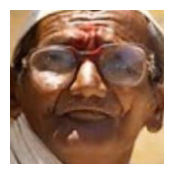

26
1


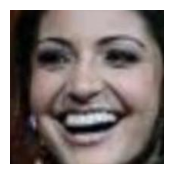

75
0


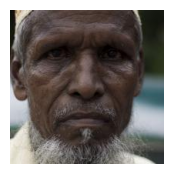

43
0


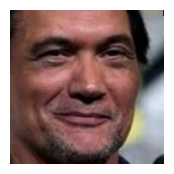

2
1


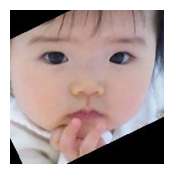

16
0


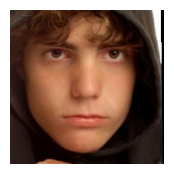

71
1


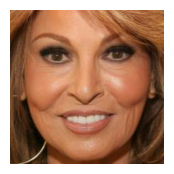

2
0


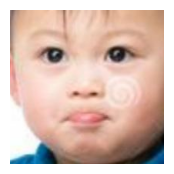

1
1


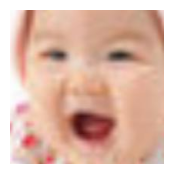

36
0


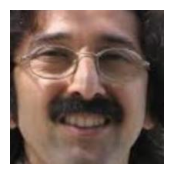

In [8]:
import cv2
import matplotlib.pyplot as plt

# Load and display the first 10 images
for i in range(10):
    image_path = image_paths[i]
    image = cv2.imread(image_path)

    # Display the image using Matplotlib
    plt.figure(figsize=(2, 2))
    print(age_labels[i])
    print(gender_labels[i])
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [9]:
import pandas as pd 
df = pd.DataFrame()
df['image_path'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head(10)

image_path  age  gender
0  /kaggle/input/utkface-new/UTKFace/89_0_3_20170...   89       0
1  /kaggle/input/utkface-new/UTKFace/26_1_3_20170...   26       1
2  /kaggle/input/utkface-new/UTKFace/75_0_3_20170...   75       0
3  /kaggle/input/utkface-new/UTKFace/43_0_4_20170...   43       0
4  /kaggle/input/utkface-new/UTKFace/2_1_2_201612...    2       1
5  /kaggle/input/utkface-new/UTKFace/16_0_0_20170...   16       0
6  /kaggle/input/utkface-new/UTKFace/71_1_0_20170...   71       1
7  /kaggle/input/utkface-new/UTKFace/2_0_2_201612...    2       0
8  /kaggle/input/utkface-new/UTKFace/1_1_2_201612...    1       1
9  /kaggle/input/utkface-new/UTKFace/36_0_3_20170...   36       0

EDA

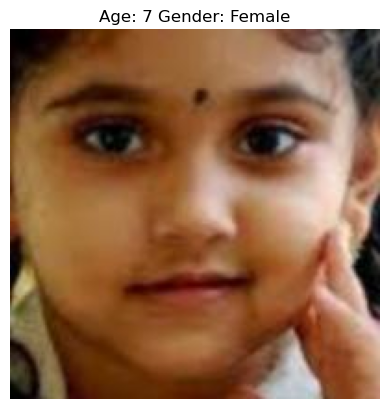

In [10]:
from PIL import Image

rand_index = random.randint(0, len(image_paths))
age = df['age'][rand_index]
gender = df['gender'][rand_index]
IMG = Image.open(df['image_path'][rand_index])
plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
plt.axis('off')
plt.imshow(IMG)

<Axes: xlabel='age', ylabel='Density'>

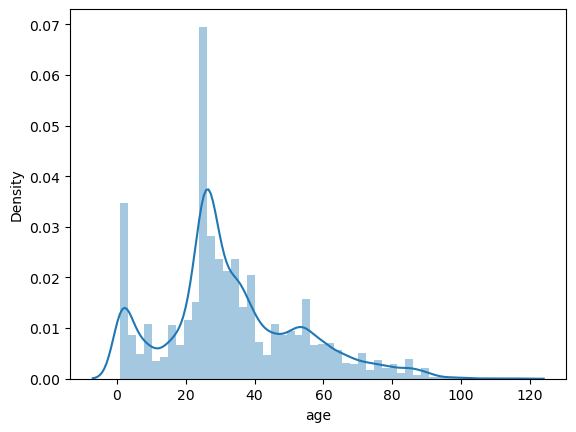

In [11]:
 # Age distribution
 sns.distplot(df['age'])

In [12]:
df['gender'].value_counts()

0    12391
1    11317
Name: gender, dtype: int64

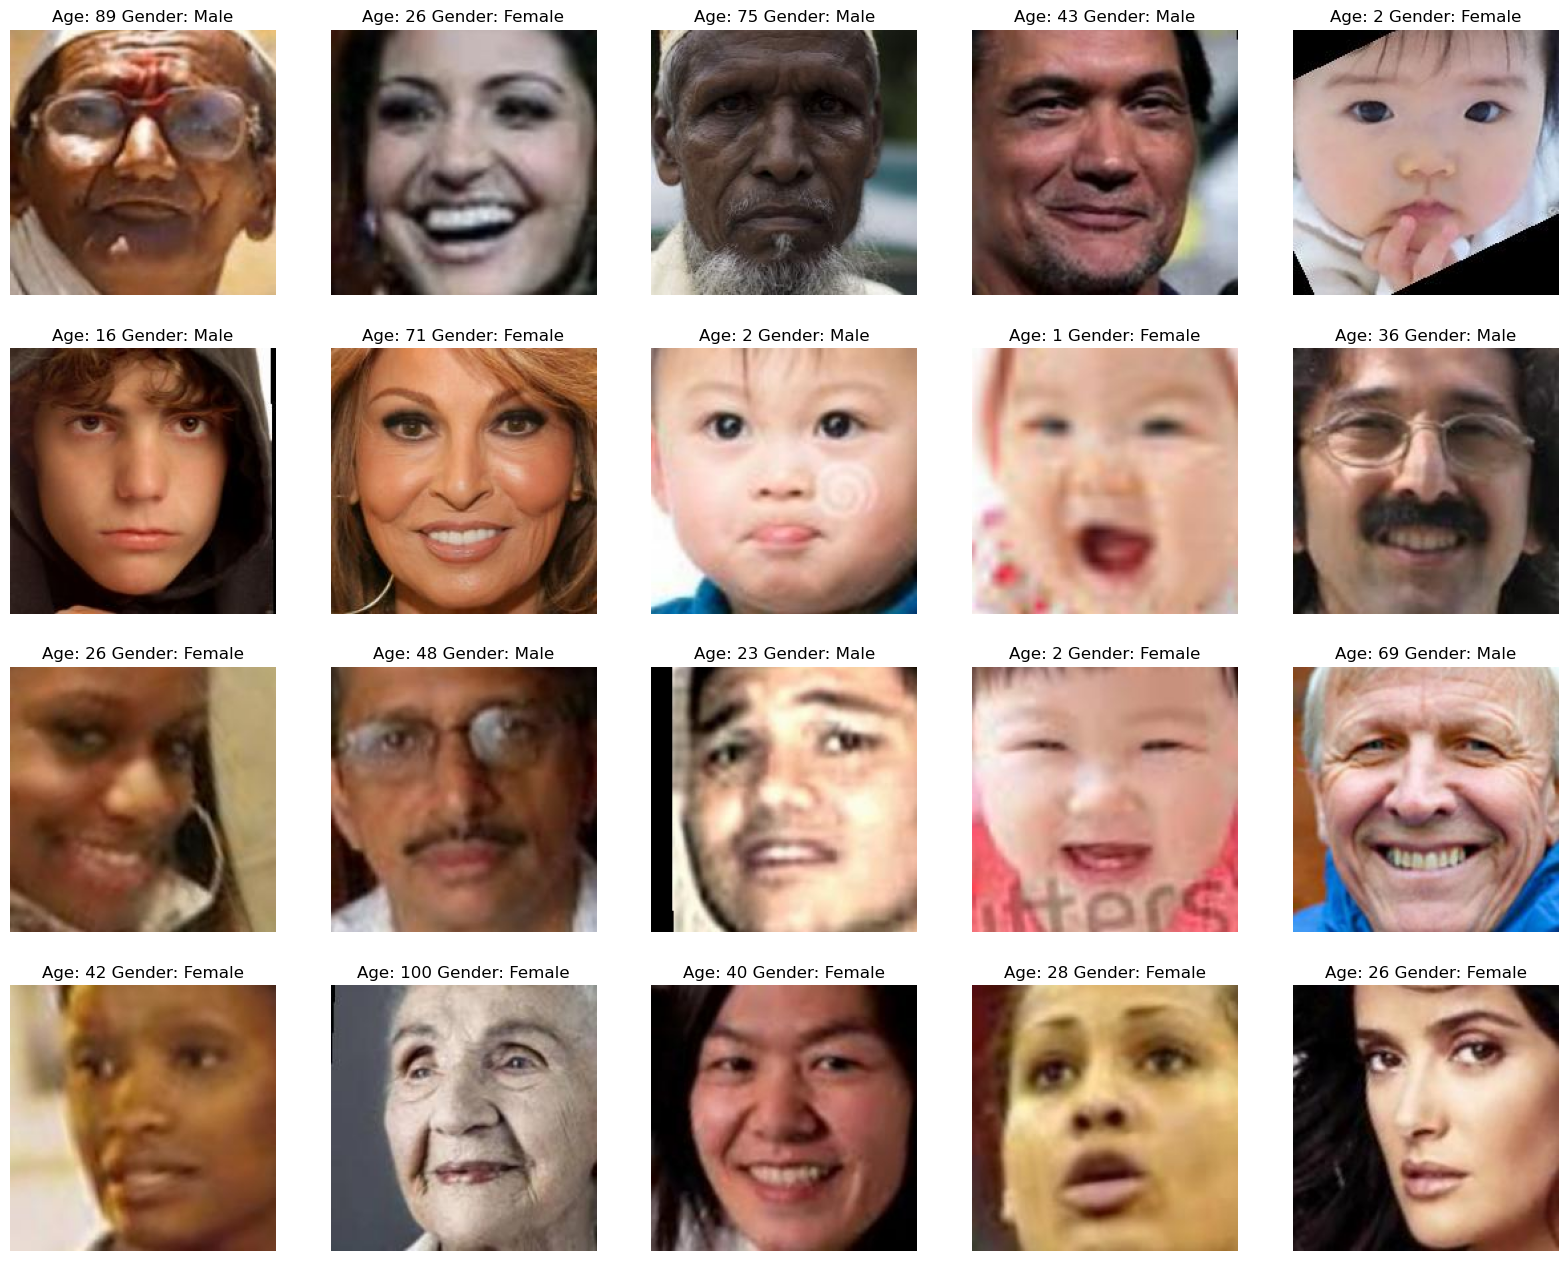

In [13]:
plt.figure(figsize=(20, 20))
samples = df.iloc[0:20]

for index, sample, age, gender in samples.itertuples():
    plt.subplot(5, 5, index + 1)
    img = load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
    plt.imshow(img)

***FEATURE EXTRACTION***

In [14]:
def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [15]:
X = extract_image_features(df['image_path'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [16]:
X.shape

(23708, 128, 128, 1)

In [17]:
X = X / 255.0

In [18]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [19]:
print(y_gender[:10])
print(y_age[:10])

[0 1 0 0 1 0 1 0 1 0]
[89 26 75 43  2 16 71  2  1 36]


In [20]:
input_shape = (128, 128, 1)

In [21]:
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(max_4)

# fully connected layers
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 63, 63, 32)   0           ['conv2d[0][0]']                 
                                                                                              

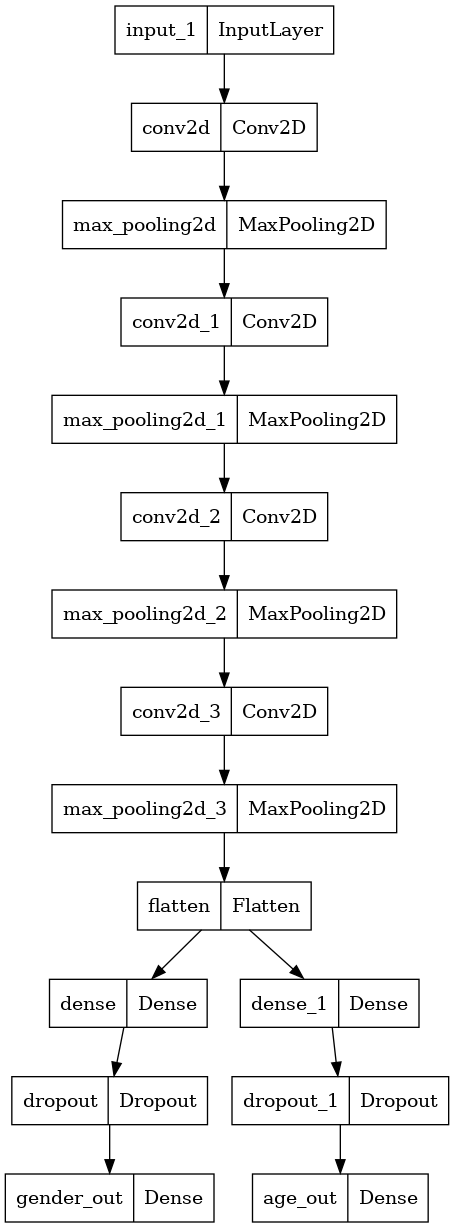

In [23]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [24]:
history = model.fit(x=X, y=[y_gender, y_age],
                    batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
593/593 [==============================] - 30s 22ms/step - loss: 15.3676 - gender_out_loss: 0.6664 - age_out_loss: 14.7012 - gender_out_accuracy: 0.5708 - age_out_accuracy: 0.0467 - val_loss: 13.3301 - val_gender_out_loss: 0.5329 - val_age_out_loss: 12.7972 - val_gender_out_accuracy: 0.7349 - val_age_out_accuracy: 0.0358
Epoch 2/50
593/593 [==============================] - 11s 19ms/step - loss: 11.1896 - gender_out_loss: 0.4916 - age_out_loss: 10.6980 - gender_out_accuracy: 0.7630 - age_out_accuracy: 0.0403 - val_loss: 9.6722 - val_gender_out_loss: 0.4227 - val_age_out_loss: 9.2495 - val_gender_out_accuracy: 0.8032 - val_age_out_accuracy: 0.0426
Epoch 3/50
593/593 [==============================] - 11s 19ms/step - loss: 9.4857 - gender_out_loss: 0.4101 - age_out_loss: 9.0755 - gender_out_accuracy: 0.8088 - age_out_accuracy: 0.0428 - val_loss: 8.7643 - val_gender_out_loss: 0.3805 - val_age_out_loss: 8.3838 - val_gender_out_accuracy: 0.8288 - val_age_out_accuracy: 0.0479
Epoc

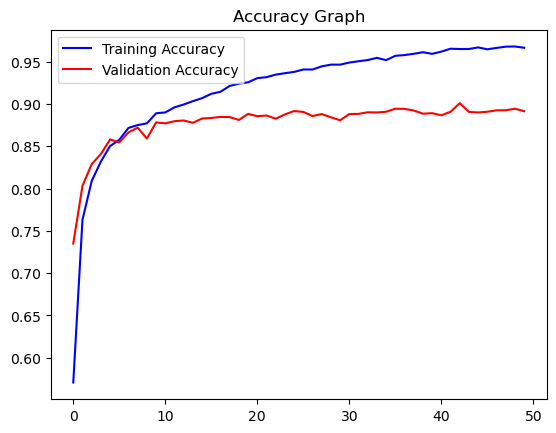

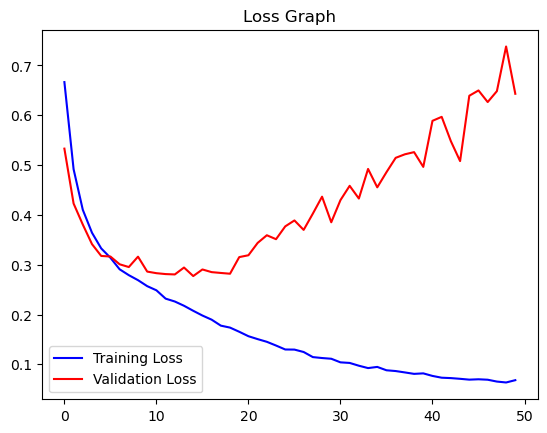

In [25]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

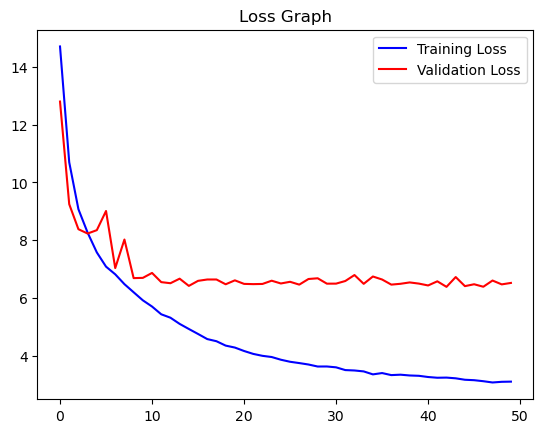

In [26]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

# **PREDICTION**

In [27]:
def get_image_features(image):
  img = load_img(image, grayscale=True)
  img = img.resize((128, 128), Image.ANTIALIAS)
  img = np.array(img)
  img = img.reshape(1, 128, 128, 1)
  img = img / 255.0
  return img

1/1 [==============================] - 0s 204ms/step


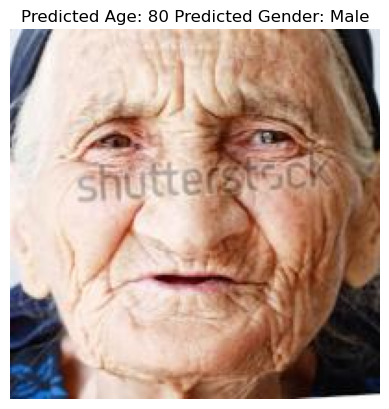

In [28]:
img_to_test = '/kaggle/input/utkface-new/crop_part1/100_1_0_20170110183726390.jpg.chip.jpg'
features = get_image_features(img_to_test)
pred = model.predict(features)
gender = gender_mapping[round(pred[0][0][0])]
age = round(pred[1][0][0])

plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))

In [29]:
BASE_DIR_1 = '/kaggle/input/utkface-new/crop_part1'
age_labels_1 = []
gender_labels_1 = []
image_paths_1 = []

image_filenames_1 = os.listdir(BASE_DIR_1)
random.shuffle(image_filenames_1)

for image in tqdm(image_filenames_1):
  image_path_1 = os.path.join(BASE_DIR_1, image)
  img_components_1 = image.split('_')
  age_label_1 = int(img_components_1[0])
  gender_label_1 = int(img_components_1[1])

  # Append the image_path, age_label, and gender_label
  age_labels_1.append(age_label_1)
  gender_labels_1.append(gender_label_1)
  image_paths_1.append(image_path_1)

  0%|          | 0/9780 [00:00<?, ?it/s]

In [30]:
age_labels_1[:5]

[1, 7, 4, 25, 1]

1
0


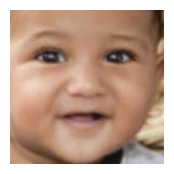

7
0


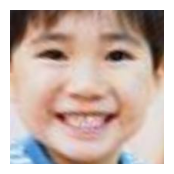

4
1


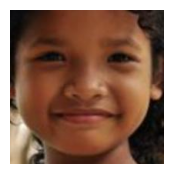

25
1


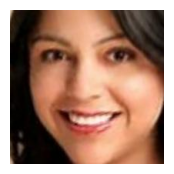

1
0


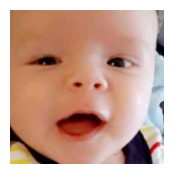

39
1


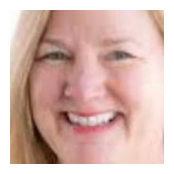

7
1


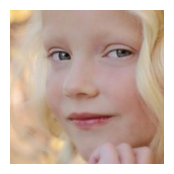

66
0


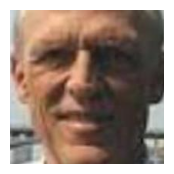

58
1


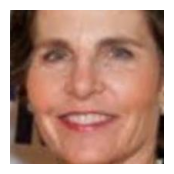

45
1


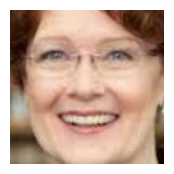

In [31]:
import cv2
import matplotlib.pyplot as plt

# Load and display the first 10 images
for i in range(10):
    image_path_1 = image_paths_1[i]
    image = cv2.imread(image_path_1)

    # Display the image using Matplotlib
    plt.figure(figsize=(2, 2))
    print(age_labels_1[i])
    print(gender_labels_1[i])
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [32]:
image_paths_1[0]

'/kaggle/input/utkface-new/crop_part1/1_0_3_20161220142926159.jpg.chip.jpg'

1/1 [==============================] - 0s 21ms/step
Actual Age: 1 Actual Gender: 0


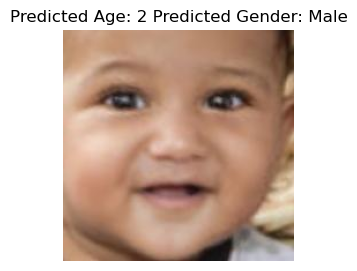

1/1 [==============================] - 0s 21ms/step
Actual Age: 7 Actual Gender: 0


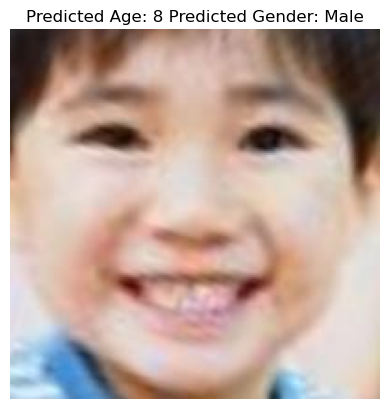

1/1 [==============================] - 0s 21ms/step
Actual Age: 4 Actual Gender: 1


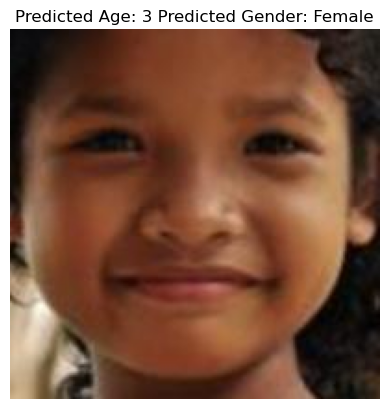

1/1 [==============================] - 0s 19ms/step
Actual Age: 25 Actual Gender: 1


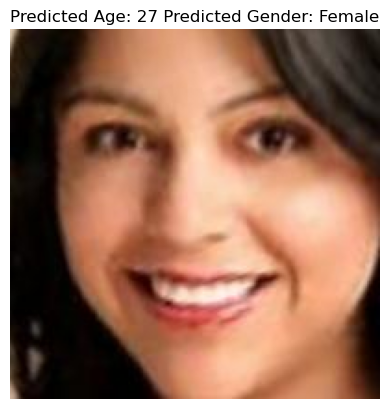

1/1 [==============================] - 0s 21ms/step
Actual Age: 1 Actual Gender: 0


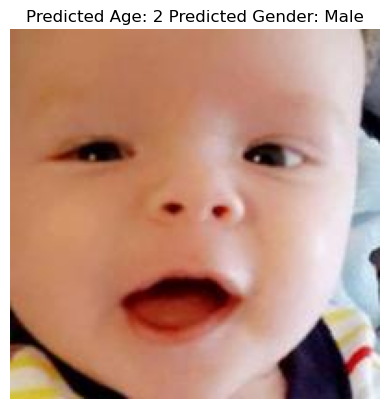

1/1 [==============================] - 0s 20ms/step
Actual Age: 39 Actual Gender: 1


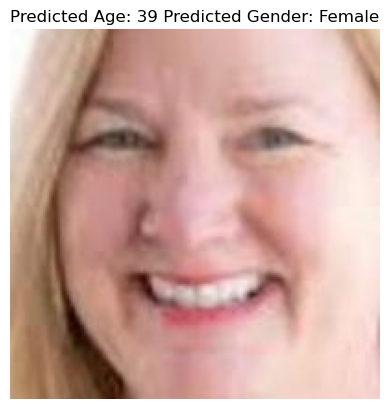

1/1 [==============================] - 0s 20ms/step
Actual Age: 7 Actual Gender: 1


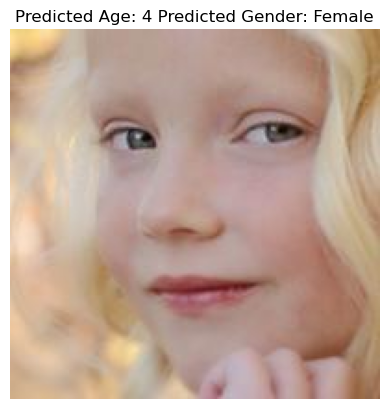

1/1 [==============================] - 0s 19ms/step
Actual Age: 66 Actual Gender: 0


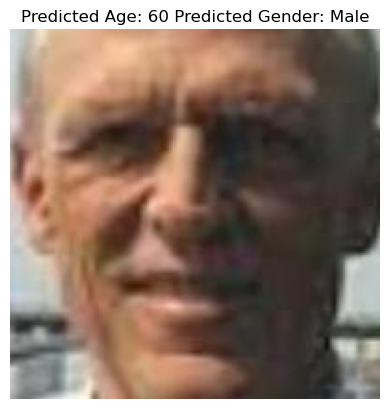

1/1 [==============================] - 0s 19ms/step
Actual Age: 58 Actual Gender: 1


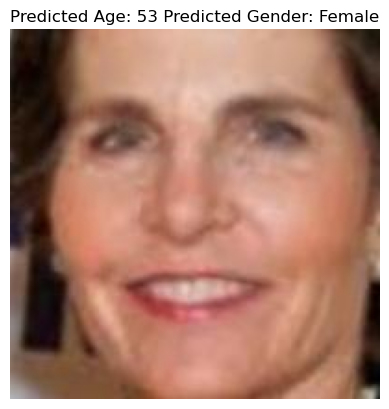

1/1 [==============================] - 0s 20ms/step
Actual Age: 45 Actual Gender: 1


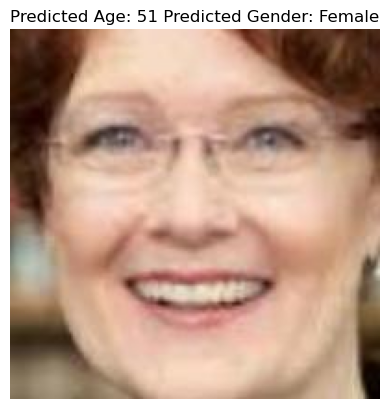

In [33]:
plt.figure(figsize=(3,3))
for i in range(10):
    img_to_test = image_paths_1[i]  # Use the current index 'i' to select a different image
    plt.imshow(np.array(load_img(img_to_test)))
    features = get_image_features(img_to_test)
    pred = model.predict(features)
    gender = gender_mapping[round(pred[0][0][0])]
    age = round(pred[1][0][0])

    plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
    print(f'Actual Age: {age_labels_1[i]} Actual Gender: {gender_labels_1[i]}')
    plt.axis('off')
    plt.show()  # Show the image in each iteration
#     print('--Actual--')
#     print(age_labels_1[i])
#     print(gender_labels_1[i])
#     print('----------------')

In [34]:
# Save the trained model to a file
model.save('your_model_name.h5')
